In [332]:
import pandas as pd
import numpy as np
dfTesting = pd.read_csv("validTestingResults.csv", sep=";", header=0, index_col=None)
dfTesting.head()

,id,userID,objectID,visited_objects,eventType,eventValue,position,date
0,38,2673313,387,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26
1,39,2673313,4911,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26
2,40,2673313,4788,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26
3,41,2673313,6219,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26
4,42,2673313,1687,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26


In [333]:
dfIF = pd.read_csv("recent_implicit_feedback.csv", sep=";", header=0, index_col=None)
dfIF.head()

,id,userID,objectID,eventType,eventValue,lastModified
0,3706361,2705429,263,pageview,1,2018-07-16 00:04:42
1,3706364,2705430,5734,pageview,1,2018-07-16 00:07:05
2,3706366,2705431,324,pageview,1,2018-07-16 00:11:04
3,3706369,2705431,108,pageview,1,2018-07-16 00:11:48
4,3706372,2705433,303,pageview,1,2018-07-16 01:03:41


In [334]:
resOO = pd.read_csv("results_open_object.csv", sep=";", header=0, index_col=0)
resOO.head()

,cnt
recVariant,
0,18
1,24
2,28
3,21
4,16


In [335]:
sum(resOO.cnt)

284

In [336]:
resSO = pd.read_csv("results_shown_object.csv", sep=";", header=0, index_col=0)
resSO.head()

,cnt
recVariant,
0,2802
1,3042
2,3021
3,3130
4,3022


In [338]:
sum(resSO.cnt)

37390

In [339]:
resOO["ctr"] = resOO.cnt / resSO.cnt

In [340]:
merged = pd.merge(dfTesting, dfIF, how='inner', on=("userID", "objectID"))
merged.head()

,id_x,userID,objectID,visited_objects,eventType_x,eventValue_x,position,date,id_y,eventType_y,eventValue_y,lastModified
0,38,2673313,387,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26,3712651,pageview,1,2018-07-20 13:06:34
1,39,2673313,4911,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26,3664714,pageview,6,2018-07-20 17:21:27
2,104,2709558,352,1,object_shown_in_list,1,recomended,2018-07-20 17:37:39,3712985,pageview,3,2018-07-20 17:48:12
3,116,2709558,352,1,object_opened_from_list,1,recomended,2018-07-20 17:40:32,3712985,pageview,3,2018-07-20 17:48:12
4,117,2709558,352,1,object_shown_in_list,1,recomended,2018-07-20 17:40:32,3712985,pageview,3,2018-07-20 17:48:12


In [341]:
import datetime
merged["dateX"] = pd.to_datetime(merged.date)
merged["lastModifiedX"] = pd.to_datetime(merged.lastModified)
merged["dtDiff"] = (merged["lastModifiedX"] - merged["dateX"]).dt.seconds
merged.head()

,id_x,userID,objectID,visited_objects,eventType_x,eventValue_x,position,date,id_y,eventType_y,eventValue_y,lastModified,dateX,lastModifiedX,dtDiff
0,38,2673313,387,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26,3712651,pageview,1,2018-07-20 13:06:34,2018-07-20 17:21:26,2018-07-20 13:06:34,71108
1,39,2673313,4911,2,object_shown_in_list,1,recomended,2018-07-20 17:21:26,3664714,pageview,6,2018-07-20 17:21:27,2018-07-20 17:21:26,2018-07-20 17:21:27,1
2,104,2709558,352,1,object_shown_in_list,1,recomended,2018-07-20 17:37:39,3712985,pageview,3,2018-07-20 17:48:12,2018-07-20 17:37:39,2018-07-20 17:48:12,633
3,116,2709558,352,1,object_opened_from_list,1,recomended,2018-07-20 17:40:32,3712985,pageview,3,2018-07-20 17:48:12,2018-07-20 17:40:32,2018-07-20 17:48:12,460
4,117,2709558,352,1,object_shown_in_list,1,recomended,2018-07-20 17:40:32,3712985,pageview,3,2018-07-20 17:48:12,2018-07-20 17:40:32,2018-07-20 17:48:12,460


In [342]:
mergedRestr = merged.loc[(merged.date < merged.lastModified) & (merged.dtDiff > 5) & (merged.eventType_x == "object_shown_in_list") & (merged.visited_objects > 0) & (merged.eventType_y == "pageview")]
mergedRestr.head()

,id_x,userID,objectID,visited_objects,eventType_x,eventValue_x,position,date,id_y,eventType_y,eventValue_y,lastModified,dateX,lastModifiedX,dtDiff
2,104,2709558,352,1,object_shown_in_list,1,recomended,2018-07-20 17:37:39,3712985,pageview,3,2018-07-20 17:48:12,2018-07-20 17:37:39,2018-07-20 17:48:12,633
4,117,2709558,352,1,object_shown_in_list,1,recomended,2018-07-20 17:40:32,3712985,pageview,3,2018-07-20 17:48:12,2018-07-20 17:40:32,2018-07-20 17:48:12,460
5,131,2709558,4330,1,object_shown_in_list,1,recomended,2018-07-20 17:41:54,3713002,pageview,3,2018-07-20 17:47:55,2018-07-20 17:41:54,2018-07-20 17:47:55,361
6,137,2709558,4330,1,object_shown_in_list,1,recomended,2018-07-20 17:42:27,3713002,pageview,3,2018-07-20 17:47:55,2018-07-20 17:42:27,2018-07-20 17:47:55,328
7,143,2709558,4330,1,object_shown_in_list,1,recomended,2018-07-20 17:42:39,3713002,pageview,3,2018-07-20 17:47:55,2018-07-20 17:42:39,2018-07-20 17:47:55,316


In [343]:
mergedRestr.shape

(2263, 15)

In [344]:
(merged.shape, mergedRestr.shape)

((7068, 15), (2263, 15))

In [345]:
mergedRestr["recVariant"] = mergedRestr.userID % 12
mergedRestr = mergedRestr[["recVariant","date","lastModified"]]
mergedRestr.head()

C:\Users\peska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,recVariant,date,lastModified
2,6,2018-07-20 17:37:39,2018-07-20 17:48:12
4,6,2018-07-20 17:40:32,2018-07-20 17:48:12
5,6,2018-07-20 17:41:54,2018-07-20 17:47:55
6,6,2018-07-20 17:42:27,2018-07-20 17:47:55
7,6,2018-07-20 17:42:39,2018-07-20 17:47:55


In [346]:
dfGroup = mergedRestr.groupby(by=["recVariant"])
dfSum = dfGroup.count()
dfSum

,date,lastModified
recVariant,,
0,99,99
1,139,139
2,156,156
3,136,136
4,177,177
5,37,37
6,443,443
7,158,158
8,172,172


In [347]:
resOO["vrr"] = dfSum.date/resSO.cnt

In [348]:
algVariants = [{"name":"doc2vec", "params": "128,1", "aggregation": "last", "diversity": "no", "novelty": "yes"},
            {"name":"doc2vec", "params": "128,1", "aggregation": "temporal", "diversity": "yes", "novelty": "no"},
            {"name":"doc2vec", "params": "32,5", "aggregation": "mean", "diversity": "no", "novelty": "no"},
            {"name":"doc2vec", "params": "32,5", "aggregation": "mean", "diversity": "yes", "novelty": "no"},
            {"name":"doc2vec", "params": "128,5", "aggregation": "max", "diversity": "no", "novelty": "yes"},
            {"name":"attributeCosineSim", "params": "noSameObjects", "aggregation": "temporal", "diversity": "no", "novelty": "yes"},
            {"name":"attributeCosineSim", "params": "sameAllowed", "aggregation": "mean", "diversity": "no", "novelty": "yes"},
            {"name":"attributeCosineSim", "params": "sameAllowed", "aggregation": "window10", "diversity": "no", "novelty": "no"},
            {"name":"word2vec", "params": "64,5", "aggregation": "mean", "diversity": "yes", "novelty": "no"},
            {"name":"word2vec", "params": "32,5", "aggregation": "temporal", "diversity": "no", "novelty": "yes"},
            {"name":"word2vec", "params": "128,3", "aggregation": "last", "diversity": "no", "novelty": "no"},
            {"name":"word2vec", "params": "32,3", "aggregation": "window10", "diversity": "no", "novelty": "no"}]
#resOO["algorithm"] = algVariants
#resOO

In [349]:
np.corrcoef(resOO.ctr, resOO.vrr)

array([[1.        , 0.03962154],
       [0.03962154, 1.        ]])

In [350]:
from scipy.stats import spearmanr
spearmanr(resOO.ctr, resOO.vrr)

SpearmanrResult(correlation=0.3706293706293707, pvalue=0.2356210035126457)

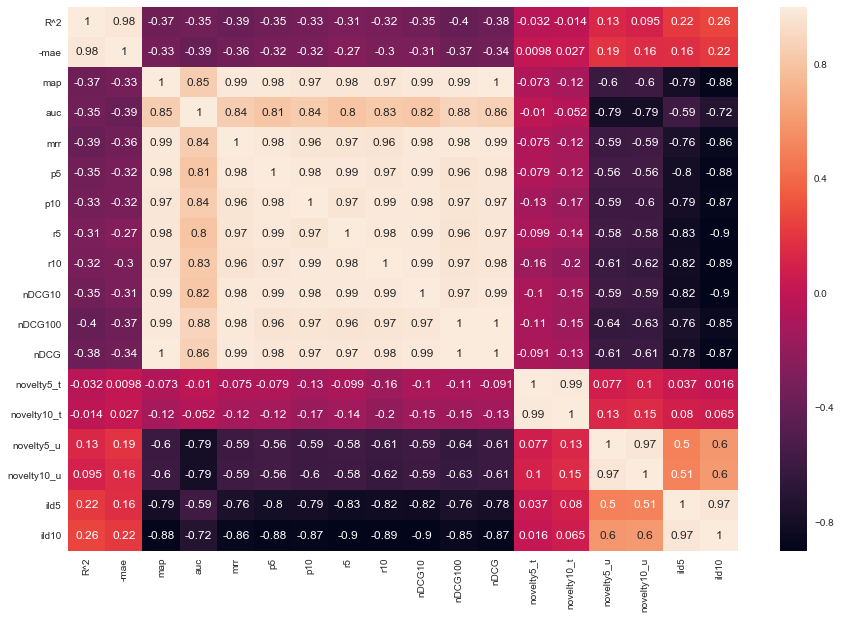

In [351]:
#get data from off-line evaluation
df = pd.read_csv("../../resultsWithNovDiv_32_0dot01Temporal.csv", sep=";", header=0, index_col=None)
df.user_novelty5 = 1-df.user_novelty5
df.user_novelty10 = 1-df.user_novelty10
df.mae = -df.mae
df.rename(columns={"r2Score":"R^2", "mae":"-mae", "aucScore":"auc", "nDCGFull":"nDCG", "novelty5":"novelty5_t", "novelty10":"novelty10_t", "user_novelty5":"novelty5_u", "user_novelty10":"novelty10_u"}, inplace=True)
del df["uid"]

%matplotlib inline
dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(dfMean.corr(method='spearman'), annot=True)
ax.set_xticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_xticklabels(dfMean.columns)

ax.set_yticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_yticklabels(dfMean.columns)
df = df[["alg","params","recAlg","noveltyEnhance","diversityEnhance","-mae", "auc", "mrr", "nDCG100","novelty10_t","novelty10_u","ild10"]]

In [352]:
dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
dfMean.reset_index(inplace=True)
dfMean.head()


,alg,params,recAlg,noveltyEnhance,diversityEnhance,-mae,auc,mrr,nDCG100,novelty10_t,novelty10_u,ild10
0,attributeCosineSim,noSameObjects,last,no,no,-0.374933,0.736751,0.134829,0.191740,0.216582,0.998246,0.213208
1,attributeCosineSim,noSameObjects,last,no,yes,-0.374933,0.736751,0.135444,0.193977,0.217033,0.998246,0.240683
2,attributeCosineSim,noSameObjects,last,yes,no,-0.375671,0.738166,0.131909,0.189104,0.222839,0.998772,0.213817
3,attributeCosineSim,noSameObjects,last,yes,yes,-0.375671,0.738166,0.133143,0.191978,0.223193,0.998246,0.241725
4,attributeCosineSim,noSameObjects,max,no,no,-0.422967,0.795054,0.139913,0.214346,0.220340,0.992456,0.272226


In [353]:
selectedRes = map(lambda x: dfMean.loc[(dfMean.alg == x["name"]) & (dfMean.params == x["params"]) & (dfMean.recAlg == x["aggregation"]) & (dfMean.noveltyEnhance == x["novelty"])  & (dfMean.diversityEnhance == x["diversity"])  ], algVariants )
#selectedRes = map(lambda x: df.loc[(df.alg == x["name"]) ], algVariants )


In [354]:
lst = list(selectedRes)
lst

[        alg params recAlg noveltyEnhance diversityEnhance      -mae       auc  \
 82  doc2vec  128,1   last            yes               no -0.292326  0.617363   
 
          mrr   nDCG100  novelty10_t  novelty10_u     ild10  
 82  0.030878  0.056917     0.233531          1.0  0.799611  ,
         alg params    recAlg noveltyEnhance diversityEnhance      -mae  \
 93  doc2vec  128,1  temporal             no              yes -0.361817   
 
          auc       mrr   nDCG100  novelty10_t  novelty10_u     ild10  
 93  0.678597  0.031335  0.075085     0.220975     0.996848  0.838122  ,
          alg params recAlg noveltyEnhance diversityEnhance      -mae  \
 288  doc2vec   32,5   mean             no               no -0.455116   
 
           auc       mrr   nDCG100  novelty10_t  novelty10_u     ild10  
 288  0.554607  0.028117  0.049527     0.211395     0.997373  0.785867  ,
          alg params recAlg noveltyEnhance diversityEnhance      -mae  \
 289  doc2vec   32,5   mean             no  

In [355]:
dct = dict([(i, lst[i].iloc[0,:].to_dict()) for i in range(len(lst))])

In [356]:
dfx = pd.DataFrame.from_dict(dct, orient='index')
dfx.index.name = 'recVariant'
dfx.index.name 

'recVariant'

In [357]:
#dfx.merge(resOO, on="recVariant")
results = pd.concat([dfx, resOO], axis=1)

In [358]:
del results["cnt"]
results

,alg,params,recAlg,noveltyEnhance,diversityEnhance,-mae,auc,mrr,nDCG100,novelty10_t,novelty10_u,ild10,ctr,vrr
recVariant,,,,,,,,,,,,,,
0,doc2vec,"128,1",last,yes,no,-0.292326,0.617363,0.030878,0.056917,0.233531,1.000000,0.799611,0.006424,0.035332
1,doc2vec,"128,1",temporal,no,yes,-0.361817,0.678597,0.031335,0.075085,0.220975,0.996848,0.838122,0.007890,0.045694
2,doc2vec,"32,5",mean,no,no,-0.455116,0.554607,0.028117,0.049527,0.211395,0.997373,0.785867,0.009268,0.051639
3,doc2vec,"32,5",mean,no,yes,-0.455116,0.554607,0.025444,0.046461,0.214064,0.997723,0.859131,0.006709,0.043450
4,doc2vec,"128,5",max,yes,no,-0.213676,0.525550,0.012323,0.031365,0.228605,0.994571,0.740691,0.005295,0.058570
5,attributeCosineSim,noSameObjects,temporal,yes,no,-0.405553,0.797143,0.146160,0.215048,0.255013,0.994386,0.269825,0.004914,0.015152
6,attributeCosineSim,sameAllowed,mean,yes,no,-0.400451,0.795240,0.149409,0.213611,0.228657,0.993684,0.222901,0.010658,0.082835
7,attributeCosineSim,sameAllowed,window10,no,no,-0.389754,0.782645,0.127338,0.204664,0.217543,0.996316,0.208432,0.006917,0.068310
8,word2vec,"64,5",mean,no,yes,-0.413579,0.809344,0.102732,0.182148,0.215008,0.973415,0.683315,0.008230,0.050558


In [359]:
print(results.loc[results.noveltyEnhance == "yes"][["ctr","vrr"]].mean())
print(results.loc[results.noveltyEnhance == "no"][["ctr","vrr"]].mean())

print(results.loc[results.diversityEnhance == "yes"][["ctr","vrr"]].mean())
print(results.loc[results.diversityEnhance == "no"][["ctr","vrr"]].mean())

ctr    0.006785
vrr    0.047511
dtype: float64
ctr    0.007694
vrr    0.065750
dtype: float64
ctr    0.007610
vrr    0.046568
dtype: float64
ctr    0.007217
vrr    0.062011
dtype: float64


[Text(0.5,1,"Spearman's rho")]

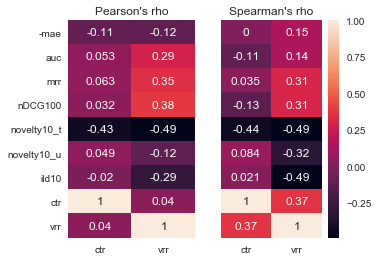

In [360]:
resultsX = results[['-mae',
 'auc',
 'mrr',
 'nDCG100',
 'novelty10_t',
 'novelty10_u',
 'ild10',
 'ctr',
 'vrr']]
fig, (ax1, ax2) = plt.subplots(1,2,  figsize=(5, 4))

sns.heatmap(resultsX.corr()[["ctr","vrr"]], annot=True, cbar=False, ax = ax1) #method='spearman'
ax1.set_xticks(np.asarray(range(len(resultsX[["ctr","vrr"]].columns)))+0.5, minor=False)
ax1.set_xticklabels(resultsX[["ctr","vrr"]].columns)

ax1.set_yticks(np.asarray(range(len(resultsX.columns)))+0.5, minor=False)
ax1.set_yticklabels(resultsX.columns)

ax1.set(title="Pearson's rho")

sns.heatmap(resultsX.corr(method='spearman')[["ctr","vrr"]], annot=True,  yticklabels=False, ax = ax2) #method='spearman'
ax2.set_xticks(np.asarray(range(len(resultsX[["ctr","vrr"]].columns)))+0.5, minor=False)
ax2.set_xticklabels(resultsX[["ctr","vrr"]].columns)

ax2.set(title="Spearman's rho")

#ax2.set_yticks(np.asarray(range(len(resultsX.columns)))+0.5, minor=False)
#ax2.set_yticklabels(resultsX.columns)

[Text(0,0.5,'-mae'),
 Text(0,1.5,'auc'),
 Text(0,2.5,'mrr'),
 Text(0,3.5,'nDCG100'),
 Text(0,4.5,'novelty10_t'),
 Text(0,5.5,'novelty10_u'),
 Text(0,6.5,'ild10'),
 Text(0,7.5,'ctr'),
 Text(0,8.5,'vrr')]

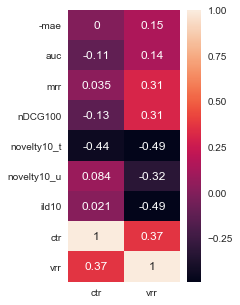

In [361]:
resultsX = results[['-mae',
 'auc',
 'mrr',
 'nDCG100',
 'novelty10_t',
 'novelty10_u',
 'ild10',
 'ctr',
 'vrr']]
fig, ax = plt.subplots(figsize=(2.5, 5))

ax = sns.heatmap(resultsX.corr(method='spearman')[["ctr","vrr"]], annot=True) #method='spearman'
ax.set_xticks(np.asarray(range(len(resultsX[["ctr","vrr"]].columns)))+0.5, minor=False)
ax.set_xticklabels(resultsX[["ctr","vrr"]].columns)

ax.set_yticks(np.asarray(range(len(resultsX.columns)))+0.5, minor=False)
ax.set_yticklabels(resultsX.columns)

In [362]:
from sklearn.linear_model import LinearRegression

lm_ctr = LinearRegression(fit_intercept=True, normalize=False)

lm_ctr.fit(resultsX[['-mae',
 'auc',
 'mrr',
 'nDCG100',
 'novelty10_t',
 'novelty10_u',
 'ild10']], resultsX["ctr"])

print(lm_ctr.coef_ )
print(lm_ctr.intercept_ )


[ 3.08837467e-05  3.75348474e-02  1.15040185e-01 -1.39602485e-01
 -1.04089089e-01 -5.77636571e-02 -4.99345300e-03]
0.07427106857870425


In [363]:
lm_vrr = LinearRegression(fit_intercept=True, normalize=False)

lm_vrr.fit(resultsX[['-mae',
 'auc',
 'mrr',
 'nDCG100',
 'novelty10_t',
 'novelty10_u',
 'ild10']], resultsX["vrr"])

print(lm_vrr.coef_ )
print(lm_vrr.intercept_ )

[ 0.04485775 -0.35590497 -0.78928341  1.26958348 -1.11191348  0.25261289
  0.01230443]
0.20727845526782215


In [364]:
from pyearth import Earth

In [382]:
X = resultsX[['-mae',
 'auc',
 'mrr',
 'nDCG100',
 'novelty10_t',
 'novelty10_u',
 'ild10']]
y =  resultsX["vrr"]

model = Earth(max_terms=10, max_degree=2, penalty = 0.5)
model.fit(X,y)
    
#Print the model
print(model.trace())
print(model.summary())

Forward Pass
-----------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq     
-----------------------------------------------------------------
0     -       -    -     0.000855  1      0.001  0.000  0.000    
1     0       4    -1    0.000650  2      0.001  0.239  0.032    
2     0       3    -1    0.000432  3      0.001  0.494  0.153    
3     2       3    -1    0.000193  4      0.001  0.775  0.482    
4     1       2    -1    0.000119  5      0.000  0.860  0.530    
5     2       2    -1    0.000079  6      0.001  0.908  0.505    
6     2       1    -1    0.000072  7      0.001  0.916  0.167    
7     1       6    -1    0.000061  8      0.002  0.928  -0.715   
8     1       4    -1    0.000036  9      0.005  0.958  -4.127   
9     1       3    -1    0.000024  10     0.055  0.972  -53.248  
-----------------------------------------------------------------
Stopping Condition 3: GRSQ too low

Pruning Pass
--------------

C:\Users\peska\Anaconda3\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\peska\Anaconda3\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


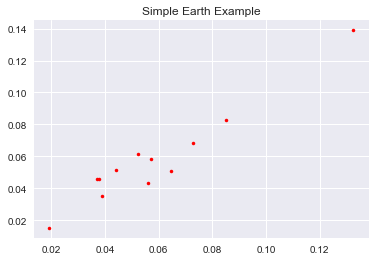

In [383]:
from matplotlib import pyplot
y_hat = model.predict(X)
pyplot.figure()
pyplot.plot(y_hat,y,'r.')

pyplot.title('Simple Earth Example')
pyplot.show()

In [ ]:
Xall = dfMean[['-mae',
 'auc',
 'mrr',
 'nDCG100',
 'novelty10_t',
 'novelty10_u',
 'ild10']]


In [384]:
y_hatMars = model.predict(Xall)

In [385]:
y_hatLM = lm_vrr.predict(Xall)

In [386]:
len(y_hatMars)

800

In [387]:
dfMean["vrr_hat_MARS"] = y_hatMars
dfMean["vrr_hat_LM"] = y_hatLM
dfMean.head()

,alg,params,recAlg,noveltyEnhance,diversityEnhance,vrr_hat_MARS,vrr_hat_LM
0,attributeCosineSim,noSameObjects,last,no,no,0.066200,0.079231
1,attributeCosineSim,noSameObjects,last,no,yes,0.073571,0.081422
2,attributeCosineSim,noSameObjects,last,yes,no,0.062008,0.070836
3,attributeCosineSim,noSameObjects,last,yes,yes,0.070259,0.073327
4,attributeCosineSim,noSameObjects,max,no,no,0.095472,0.076097


In [388]:
dfMean = dfMean[["alg","params","recAlg","noveltyEnhance","diversityEnhance","vrr_hat_MARS","vrr_hat_LM"]]

In [389]:
dfMean[["vrr_hat_MARS","vrr_hat_LM"]].corr()

,vrr_hat_MARS,vrr_hat_LM
vrr_hat_MARS,1.00000,0.86048
vrr_hat_LM,0.86048,1.00000


In [390]:
dfMean[["vrr_hat_MARS","vrr_hat_LM"]].corr(method="spearman")

,vrr_hat_MARS,vrr_hat_LM
vrr_hat_MARS,1.000000,0.743661
vrr_hat_LM,0.743661,1.000000


In [391]:
dfGroup = dfMean.groupby(by=["alg"])
dfMean2 = dfGroup.mean()
dfMean2

,vrr_hat_MARS,vrr_hat_LM
alg,,
attributeCosineSim,0.076313,0.067553
doc2vec,0.012935,0.030910
word2vec,0.045593,0.070758


In [392]:
dfGroup = dfMean.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMax = dfGroup.mean()
dfMax = dfMax.groupby(by=["alg"])
dfMax.max()

,vrr_hat_MARS,vrr_hat_LM
alg,,
attributeCosineSim,0.163113,0.089776
doc2vec,0.072925,0.067795
word2vec,0.132518,0.104342


In [409]:
dfGroup = dfMean.groupby(by=["recAlg"])
dfMean2 = dfGroup.mean()
dfMean2

,vrr_hat_MARS,vrr_hat_LM
recAlg,,
last,0.058351,0.068409
max,0.047734,0.063624
mean,0.065790,0.055456
temporal,-0.019981,0.027926
temporal10,-0.008527,0.034862
temporal3,0.010795,0.043797
temporal5,0.004799,0.040660
window10,0.061013,0.061458
window3,0.059644,0.065259


In [410]:
print(dfMean2.loc[dfMean2.index.isin( ["mean","temporal","temporal10","window10"])][["vrr_hat_MARS","vrr_hat_LM"]].mean())
print(dfMean2.loc[dfMean2.index.isin(["last","temporal3","temporal5","window3","window5"])][["vrr_hat_MARS","vrr_hat_LM"]].mean())

print(dfMean2.loc[dfMean2.index.isin( ["temporal3","temporal5","temporal10"])][["vrr_hat_MARS","vrr_hat_LM"]].mean())
print(dfMean2.loc[dfMean2.index.isin(["window3","window5","window10"])][["vrr_hat_MARS","vrr_hat_LM"]].mean())



vrr_hat_MARS    0.024574
vrr_hat_LM      0.044925
dtype: float64
vrr_hat_MARS    0.038733
vrr_hat_LM      0.056347
dtype: float64
vrr_hat_MARS    0.002356
vrr_hat_LM      0.039773
dtype: float64
vrr_hat_MARS    0.060244
vrr_hat_LM      0.063443
dtype: float64


In [411]:
dfGroup = dfMean.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMax = dfGroup.mean()
dfMax = dfMax.groupby(by=["recAlg"])
dm = dfMax.max()
dm

,vrr_hat_MARS,vrr_hat_LM
recAlg,,
last,0.094466,0.102836
max,0.116970,0.097624
mean,0.156765,0.092417
temporal,0.163113,0.093417
temporal10,0.147757,0.101046
temporal3,0.139065,0.102328
temporal5,0.134746,0.099949
window10,0.132518,0.102274
window3,0.113199,0.103287


In [412]:
print(dm.loc[dm.index.isin( ["mean","temporal","temporal10","window10"])][["vrr_hat_MARS","vrr_hat_LM"]].max())
print(dm.loc[dm.index.isin(["last","temporal3","temporal5","window3","window5"])][["vrr_hat_MARS","vrr_hat_LM"]].max())

print(dm.loc[dm.index.isin( ["temporal3","temporal5","temporal10"])][["vrr_hat_MARS","vrr_hat_LM"]].mean())
print(dm.loc[dm.index.isin(["window3","window5","window10"])][["vrr_hat_MARS","vrr_hat_LM"]].mean())

vrr_hat_MARS    0.163113
vrr_hat_LM      0.102274
dtype: float64
vrr_hat_MARS    0.139065
vrr_hat_LM      0.104342
dtype: float64
vrr_hat_MARS    0.140523
vrr_hat_LM      0.101108
dtype: float64
vrr_hat_MARS    0.123528
vrr_hat_LM      0.103301
dtype: float64


In [400]:
dfGroup = dfMean.groupby(by=["noveltyEnhance"])
dfMean2 = dfGroup.mean()
dfMean2

,vrr_hat_MARS,vrr_hat_LM
noveltyEnhance,,
no,0.062531,0.070564
yes,0.005408,0.034448


In [401]:
dfGroup = dfMean.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMax = dfGroup.mean()
dfMax = dfMax.groupby(by=["noveltyEnhance"])
dfMax.max()

,vrr_hat_MARS,vrr_hat_LM
noveltyEnhance,,
no,0.163113,0.104342
yes,0.140482,0.097352


In [402]:
dfGroup = dfMean.groupby(by=["diversityEnhance"])
dfMean2 = dfGroup.mean()
dfMean2

,vrr_hat_MARS,vrr_hat_LM
diversityEnhance,,
no,0.031498,0.054399
yes,0.036441,0.050613


In [403]:
dfGroup = dfMean.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMax = dfGroup.mean()
dfMax = dfMax.groupby(by=["diversityEnhance"])
dfMax.max()

,vrr_hat_MARS,vrr_hat_LM
diversityEnhance,,
no,0.146009,0.104342
yes,0.163113,0.093224


In [404]:
dfGroup = dfMean.groupby(by=["alg","params"])
dfMean2 = dfGroup.mean()
dfMean2

vrr_hat_MARS  vrr_hat_LM
alg                params                                 
attributeCosineSim noSameObjects      0.097592    0.065709
                   sameAllowed        0.055035    0.069397
doc2vec            128,1             -0.015049    0.015372
                   128,3              0.013349    0.040044
                   128,5              0.015779    0.035350
                   32,1               0.001014    0.021990
                   32,3               0.028657    0.032181
                   32,5               0.031854    0.041824
                   64,1              -0.007446    0.018081
                   64,3               0.023259    0.035406
                   64,5               0.024999    0.037944
word2vec           128,1              0.007554    0.059466
                   128,3              0.021993    0.066642
                   128,5              0.032931    0.068016
                   32,1               0.072691    0.080788
                   32,3               0.082912    0.079666
                   32,5               0.073582    0.080808
                   64,1               0.026829    0.065044
                   64,3               0.051959    0.070664
                   64,5               0.039889    0.065732

In [405]:
dfGroup = dfMean.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMax = dfGroup.mean()
dfMax = dfMax.groupby(by=["alg","params"])
dfMax.max()

vrr_hat_MARS  vrr_hat_LM
alg                params                                 
attributeCosineSim noSameObjects      0.163113    0.084062
                   sameAllowed        0.098901    0.089776
doc2vec            128,1              0.054990    0.046613
                   128,3              0.069427    0.065811
                   128,5              0.072925    0.065001
                   32,1               0.046755    0.045692
                   32,3               0.063300    0.054697
                   32,5               0.065040    0.067795
                   64,1               0.053225    0.050030
                   64,3               0.070918    0.062753
                   64,5               0.070239    0.066870
word2vec           128,1              0.056737    0.095797
                   128,3              0.066472    0.095709
                   128,5              0.084109    0.101046
                   32,1               0.110673    0.104342
                   32,3               0.132518    0.103287
                   32,5               0.111996    0.102328
                   64,1               0.059195    0.093169
                   64,3               0.094355    0.097557
                   64,5               0.073442    0.088736

In [418]:
dfMean.sort_values(by="vrr_hat_MARS", ascending=False, inplace=True)
dfMean.head(50)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,vrr_hat_MARS,vrr_hat_LM
13,attributeCosineSim,noSameObjects,temporal,no,yes,0.163113,0.076177
9,attributeCosineSim,noSameObjects,mean,no,yes,0.156765,0.074123
17,attributeCosineSim,noSameObjects,temporal10,no,yes,0.147757,0.077284
12,attributeCosineSim,noSameObjects,temporal,no,no,0.146009,0.077107
8,attributeCosineSim,noSameObjects,mean,no,no,0.140579,0.075448
11,attributeCosineSim,noSameObjects,mean,yes,yes,0.140482,0.058035
16,attributeCosineSim,noSameObjects,temporal10,no,no,0.140391,0.080348
21,attributeCosineSim,noSameObjects,temporal3,no,yes,0.139065,0.081370
25,attributeCosineSim,noSameObjects,temporal5,no,yes,0.134746,0.082804
628,word2vec,"32,3",window10,no,no,0.132518,0.099923


In [417]:
dfMean.sort_values(by="vrr_hat_LM", ascending=False, inplace=True)
dfMean.head(50)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,vrr_hat_MARS,vrr_hat_LM
596,word2vec,"32,1",window5,no,no,0.097139,0.104342
632,word2vec,"32,3",window3,no,no,0.101017,0.103287
600,word2vec,"32,3",last,no,no,0.094466,0.102836
592,word2vec,"32,1",window3,no,no,0.088682,0.102552
636,word2vec,"32,3",window5,no,no,0.117284,0.102331
660,word2vec,"32,5",temporal3,no,no,0.089649,0.102328
668,word2vec,"32,5",window10,no,no,0.104480,0.102274
588,word2vec,"32,1",window10,no,no,0.110673,0.101119
672,word2vec,"32,5",window3,no,no,0.083013,0.101103
536,word2vec,"128,5",temporal10,no,no,0.077138,0.101046
